In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_data = pd.read_csv('./kaggle_data/data.csv', delimiter=',')
df_data_w_generes = pd.read_csv('./kaggle_data/data_w_genres.csv', delimiter=',')
df_data_by_artist = pd.read_csv('./kaggle_data/data_by_artist.csv', delimiter=',')
df_data_by_genres = pd.read_csv('./kaggle_data/data_by_genres.csv', delimiter=',')
df_data_by_year = pd.read_csv('./kaggle_data/data_by_year.csv', delimiter=',')


# Korelacja

In [2]:
df_data.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


Najwyzsza korelacje osigaja cechy Year i Popularity ~ 0.88

chcemy miec zarowno Year jak i Popularity wiec nie laczymy zadnych danych

# Wybór cech

In [3]:
df_new = df_data.copy()

df_new = df_new.drop(columns=['id',
                              'acousticness',
                              'explicit',
                              'energy',
                              'release_date',
                              'mode',
                              'key',
                              'loudness'])
df_new.head(5)

,artists,danceability,duration_ms,instrumentalness,liveness,name,popularity,speechiness,tempo,valence,year
0,['Carl Woitschach'],0.708,158648,0.563,0.1510,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.901,0.0763,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,['Seweryn Goszczyński'],0.749,104300,0.000,0.1190,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,['Francisco Canaro'],0.781,180760,0.887,0.1110,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.908,0.0980,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


# Wykresy Wstępne do czyszczenia danych

## Duration

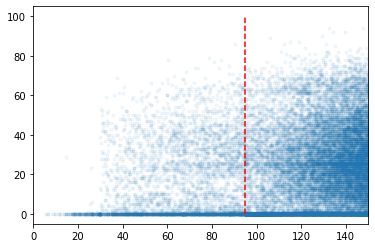

In [4]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.popularity
plt.xlim(0, 150)
plt.plot([95, 95], [0,100], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

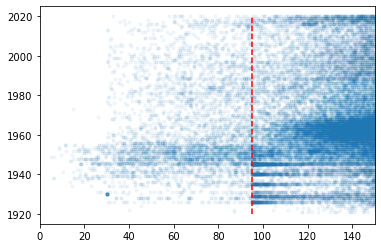

In [5]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.year
plt.xlim(0, 150)
plt.plot([95, 95], [1920,2020], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

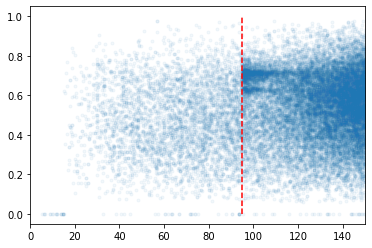

In [6]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.danceability
plt.xlim(0, 150)
plt.plot([95, 95], [0,1], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

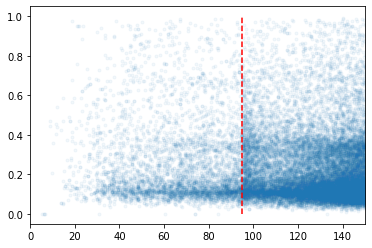

In [7]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.liveness
plt.xlim(0, 150)
plt.plot([95, 95], [0,1], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

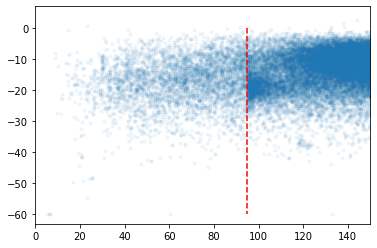

In [8]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.loudness
plt.xlim(0, 150)
plt.plot([95, 95], [0,-60], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

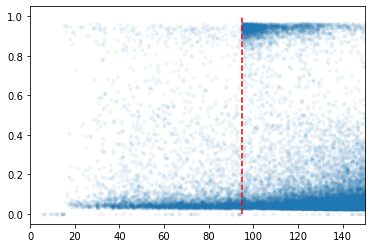

In [9]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.speechiness
plt.xlim(0, 150)
plt.plot([95, 95], [0,1], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

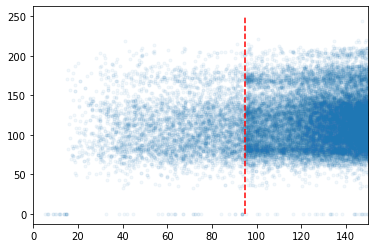

In [10]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.tempo
plt.xlim(0, 150)
plt.plot([95, 95], [0,250], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

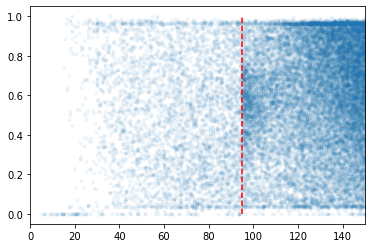

In [11]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.valence
plt.xlim(0, 150)
plt.plot([95, 95], [0,1], c='r', linestyle='--')
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

Usuwamy utwory o dlugosci mniejszej niz 95 sekund

## Popularity

In [12]:
def divider0_100(a, sectors):
    if(a==0):
        sectors[0] += 1
    elif(a < 20):
        sectors[1] += 1
    elif(a < 40):
        sectors[2] += 1
    elif(a < 60):
        sectors[3] += 1
    elif(a < 80):
        sectors[4] += 1
    else:
        sectors[5] += 1

def divider(a, sectors):
    if(a < 0.2):
        sectors[0] += 1
    elif(a < 0.4):
        sectors[1] += 1
    elif(a < 0.6):
        sectors[2] += 1
    elif(a < 0.8):
        sectors[3] += 1
    else:
        sectors[4] += 1

[27357, 24265, 50341, 50637, 16737, 572]

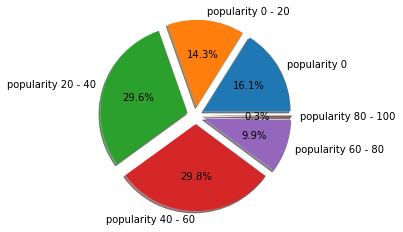

In [13]:
sectors = [0,0,0,0,0,0]

x = df_data.popularity

labels = ['popularity 0',
          'popularity 0 - 20',
          'popularity 20 - 40',
          'popularity 40 - 60',
          'popularity 60 - 80',
          'popularity 80 - 100']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
for a in x:
    divider0_100(a, sectors)

plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
sectors

In [14]:
df_temp = df_data.copy()

df_temp.drop(df_temp[df_temp.popularity != 0].index, inplace=True)

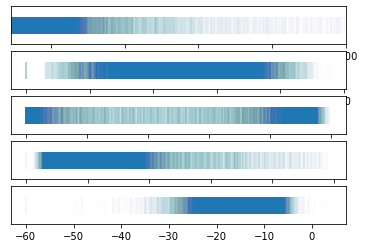

In [15]:
plt.subplot(5, 1, 1)

x = df_temp.duration_ms
x = list(map(lambda a: a/1000, x))
plt.xlim(90, 1000)
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 2)

x = df_temp.danceability
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 3)

x = df_temp.instrumentalness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 4)

x = df_temp.liveness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(5, 1, 5)

x = df_temp.loudness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

### A czy można usunąć dane o popularity = 0?

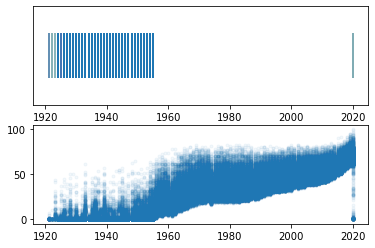

In [16]:
plt.subplot(2, 1, 1)
x = df_temp.year
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(2, 1, 2)
x = df_data.year
y = df_data.popularity
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

# Data by year

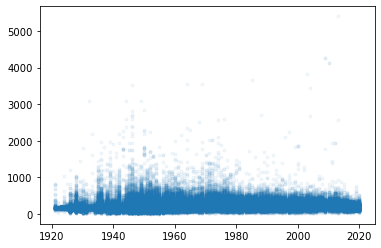

In [17]:
x = df_data.year
y = df_data.duration_ms
y = list(map(lambda a: a/1000, y))
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

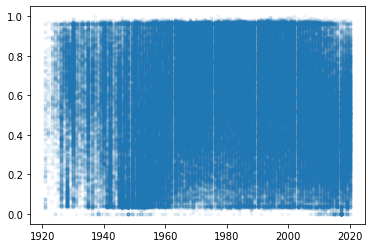

In [18]:
x = df_data.year
y = df_data.valence
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

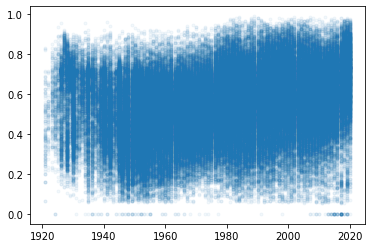

In [19]:
x = df_data.year
y = df_data.danceability
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

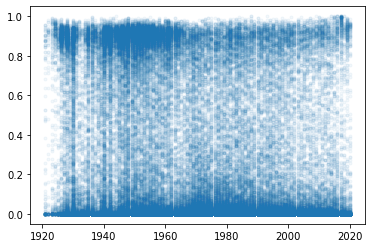

In [20]:
x = df_data.year
y = df_data.instrumentalness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

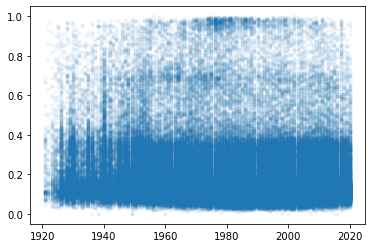

In [21]:
x = df_data.year
y = df_data.liveness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

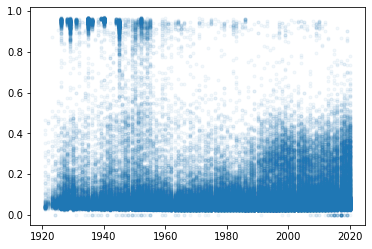

In [22]:
x = df_data.year
y = df_data.speechiness
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

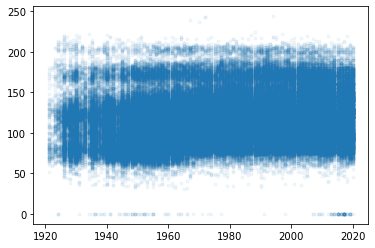

In [23]:
x = df_data.year
y = df_data.tempo
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

|   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|
|61972|	['Atlas Fret']|	0.0|	132827|	0.0|	0.000|	(silent track)|	40|	0.0|	0.0|	0.0|	2007|

Usuwamy utwory o tempie = 0.

# Przygotowanie i czyszczenie danych

### czas < 95s

In [24]:
df_new['duration'] = df_new['duration_ms'].map(lambda a: a/1000)
df_new = df_new.drop(columns=['duration_ms'])
df_new

,artists,danceability,instrumentalness,liveness,name,popularity,speechiness,tempo,valence,year,duration
0,['Carl Woitschach'],0.708,0.563000,0.1510,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,158.648
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,0.901000,0.0763,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,282.133
2,['Seweryn Goszczyński'],0.749,0.000000,0.1190,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,104.300
3,['Francisco Canaro'],0.781,0.887000,0.1110,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,180.760
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.908000,0.0980,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,687.733
...,...,...,...,...,...,...,...,...,...,...,...
169904,"['DripReport', 'Tyga']",0.875,0.000032,0.0891,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020,163.800
169905,"['Leon Bridges', 'Terrace Martin']",0.719,0.031300,0.1110,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020,167.468
169906,"['Kygo', 'Oh Wonder']",0.514,0.002330,0.1080,How Would I Know,70,0.1050,123.700,0.1530,2020,180.700
169907,"['Cash Cash', 'Andy Grammer']",0.646,0.000000,0.2220,I Found You,70,0.0385,129.916,0.4720,2020,167.308


In [25]:
df_new.drop(df_new[df_new.duration < 95].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {1 - df_new.shape[0]/ df_data.shape[0]}%")

Wszystkie dane: 169909
Zachowane dane: 165324
Usuniety % wszystkich rekordów: 0.02698503316481171%


### tempo = 0

In [26]:
temp = df_new.shape[0]
df_new.drop(df_new[df_new.tempo == 0].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {1 - df_new.shape[0] / df_data.shape[0]}%")
print("wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 95 i tempo = 0")

Wszystkie dane: 169909
Zachowane dane: 165230
Usuniety % wszystkich rekordów: 0.02753827048596602%
wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 95 i tempo = 0


In [27]:
# Jak szukac po wielu atrybutach
#df_new[(df_new.danceability == 0) & (df_new.instrumentalness == 0) & (df_new.tempo == 0)]

# Podstawowe wykresy

In [28]:
# czyste dane gotowe do analizy i eksploracji
df_ready_data = df_new.copy()

In [29]:
def make_pie_chart_0_1(column):
    sectors = [0,0,0,0,0]
    x = df_ready_data[column]

    labels = [f'{column} 0 - 0.2',
              f'{column} 0.2 - 0.4',
              f'{column} 0.4 - 0.6',
              f'{column} 0.6 - 0.8',
              f'{column} 0.8 - 1']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    for a in x:
        divider(a, sectors)
    
    plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
    plt.show()

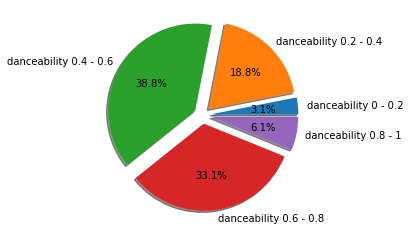

In [30]:
make_pie_chart_0_1("danceability")

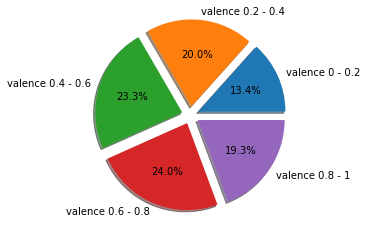

In [31]:
make_pie_chart_0_1("valence")

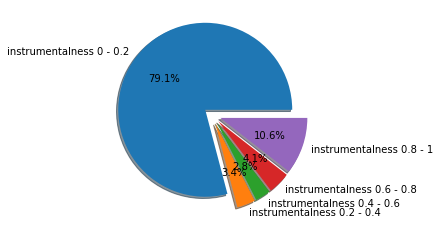

In [32]:
make_pie_chart_0_1("instrumentalness")

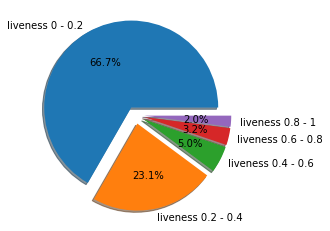

In [33]:
make_pie_chart_0_1("liveness")

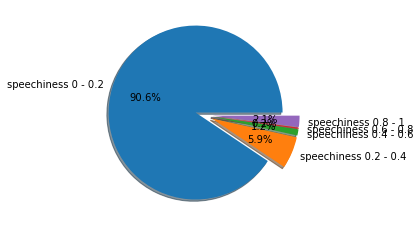

In [34]:
make_pie_chart_0_1("speechiness")

# Statystyki

In [35]:
df_ready_data_numeric = df_ready_data.copy()
df_ready_data_numeric = df_ready_data_numeric.drop(columns=['artists', 'name', 'year'])

Dalsze obliczenia nie mają sensu dla wartości nienumerycznych. Dodatkowo nie ma to sensu dla roku który jest interpretowany jako bardziej opisowy, a nie liczbowy.

In [36]:
df_ready_data_numeric_sum = pd.DataFrame(df_ready_data_numeric.isnull().sum(), columns = ["missing"])
df_ready_data_numeric_max = pd.DataFrame(df_ready_data_numeric.max(), columns = ["max"])
df_ready_data_numeric_min = pd.DataFrame(df_ready_data_numeric.min(), columns = ["min"])
df_ready_data_numeric_mean = pd.DataFrame(df_ready_data_numeric.mean(), columns = ["mean"])
df_ready_data_numeric_median = pd.DataFrame(df_ready_data_numeric.median(), columns = ["median"])
df_ready_data_numeric_std = pd.DataFrame(df_ready_data_numeric.std(), columns = ["std"])

frames = [df_ready_data_numeric_sum,
         df_ready_data_numeric_max,
         df_ready_data_numeric_min,
         df_ready_data_numeric_mean,
         df_ready_data_numeric_median,
         df_ready_data_numeric_std]

df_statistics = pd.concat(frames, axis=1)
df_statistics

,missing,max,min,mean,median,std
danceability,0,0.988,0.05510,0.540222,0.550000,0.174307
instrumentalness,0,1.000,0.00000,0.155670,0.000184,0.303401
liveness,0,1.000,0.00967,0.205396,0.134000,0.175803
popularity,0,100.000,0.00000,31.984458,34.000000,21.489470
speechiness,0,0.969,0.02220,0.092631,0.044800,0.147332
tempo,0,244.091,30.94600,117.228334,114.991000,30.465922
valence,0,1.000,0.00001,0.533533,0.546000,0.261192
duration,0,4270.034,95.00000,235.952271,210.947000,119.079893


# Elementy Odosobnione - metoda 3 sigm

In [37]:
df_filled_out = pd.DataFrame();

from IPython.display import display

list_outliers = []

for column in df_ready_data_numeric:
    df_filled_out = pd.DataFrame(df_ready_data_numeric[
            (df_ready_data_numeric[column] > (df_statistics['mean'][column] + 3 * df_statistics['std'][column])) | (df_ready_data_numeric[column] < (df_statistics['mean'][column] - 3 * df_statistics['std'][column]))][column]).join(df_data['name'])
    if(column != "popularity"):
        list_outliers.extend(df_filled_out.index)
    display(df_filled_out)

,danceability,name


,instrumentalness,name


,liveness,name
119,0.877,Edward the VIII
150,0.782,Siete Lágrimas - Remasterizado
352,0.917,"Dinah, Some of These Days"
353,0.825,Capulet's Ball
377,0.809,Mere Jeevan Ke Saathi
...,...,...
169564,0.911,Rain Sound : Night Time
169569,0.755,Serenity Rain
169607,0.913,Awakening Rain
169727,0.788,Remember When


,popularity,name
87940,99,ROCKSTAR (feat. Roddy Ricch)
87942,100,Blinding Lights
87949,97,death bed (coffee for your head) (feat. beabad...


,speechiness,name
2,0.929,Chapter 1.18 - Zamek kaniowski
9,0.954,Chapter 1.3 - Zamek kaniowski
29,0.948,Chapter 4.12 - Zamek kaniowski
38,0.957,Chapter 4.10 - Zamek kaniowski
39,0.952,Chapter 2.11 - Zamek kaniowski
...,...,...
169113,0.550,Too Much
169124,0.619,"Left Brain, Right Brain"
169458,0.556,Doubt It
169791,0.699,B*tch From Da Souf


,tempo,name
146,210.173,Pantaleón - Remasterizado
280,211.089,Me Has Robado El Corazón
1832,212.242,Rocks In My Bed
5628,209.041,Return Of The Fly
5909,209.424,Lucio Vazquez
...,...,...
164312,208.916,Blues In The Bottle
165740,211.186,Protection
168319,208.706,I Wonder Why - Remastered
168550,209.774,El Favor De La Soledad


,valence,name


,duration,name
4,687.733,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
83,785.427,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
214,754.480,"Brahms: Symphony No. 4 in E Minor, Op. 98: I. ..."
217,1170.280,Bruckner: Symphony No. 5 in B-Flat Major: I. I...
308,1038.400,"Symphony No. 9 in D Minor, Op. 125 ""Ode to Joy..."
...,...,...
167908,602.227,The Battle
168192,614.200,The Only Moment We Were Alone
168263,768.640,Medley: Down Once More / Track Down This Murderer
168416,680.920,Dope House Family


In [38]:
def plot_3_std(column, df):
    m = df_statistics['mean'][column]
    m_p3std = df_statistics['mean'][column] + 3 * df_statistics['std'][column]
    m_n3std = df_statistics['mean'][column] - 3 * df_statistics['std'][column]
    y = df
    y = y[column]
    x = range(len(y))
    plt.plot([0, len(y)], [m, m], c='r', linestyle='--')
    plt.plot([0, len(y)], [m_p3std, m_p3std], c='r', linestyle=':')
    plt.plot([0, len(y)], [m_n3std, m_n3std], c='r', linestyle=':')
    plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')
    plt.ylabel(column)
    plt.xticks([])
    plt.show()

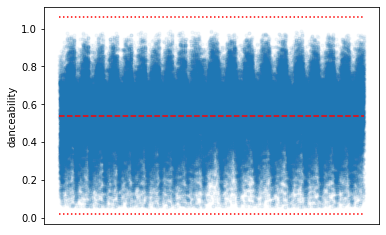

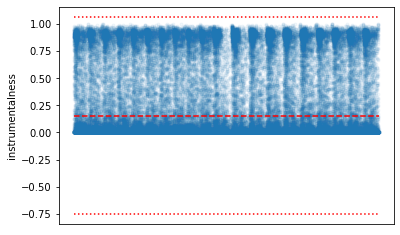

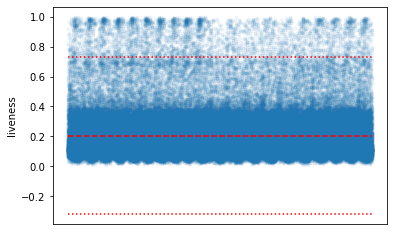

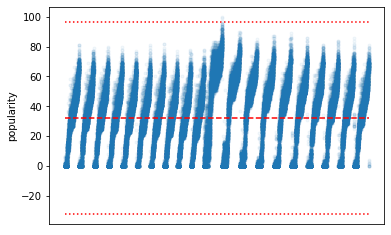

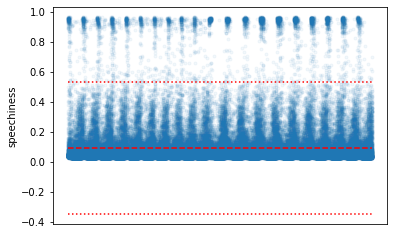

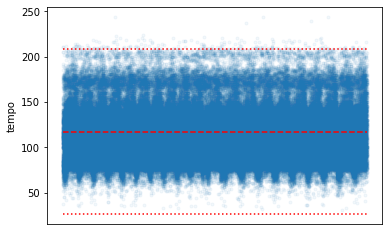

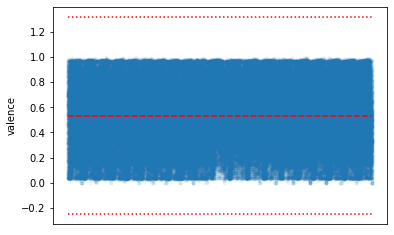

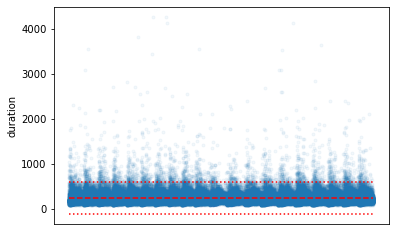

In [39]:
for column in df_ready_data_numeric:
    plot_3_std(column, df_ready_data_numeric)

### Odrzucenie elementów odosobnionych

In [40]:
list_outliers = list(dict.fromkeys(list_outliers))
df_data_without_outliers = df_ready_data.copy()
df_data_without_outliers = df_data_without_outliers.drop(list_outliers)

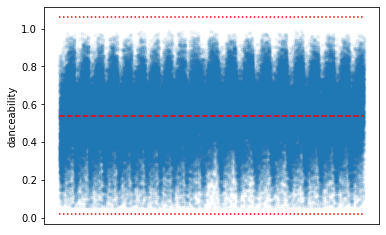

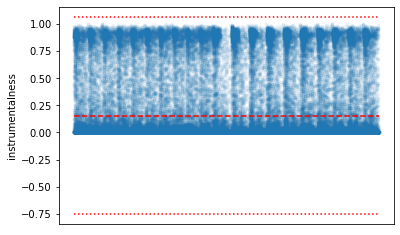

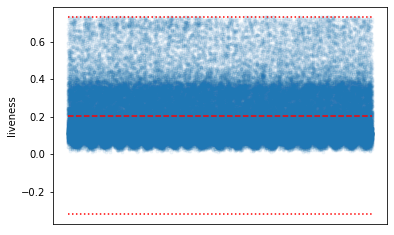

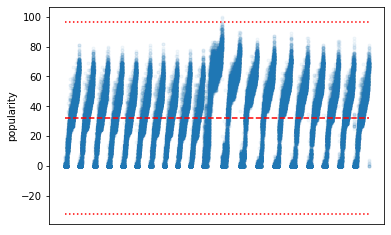

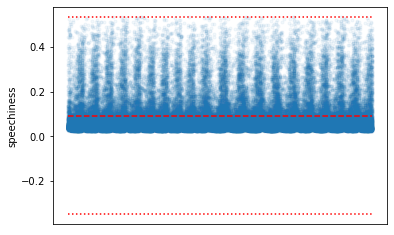

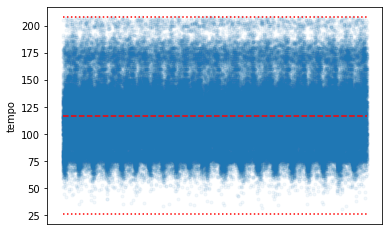

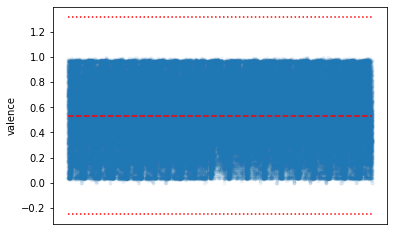

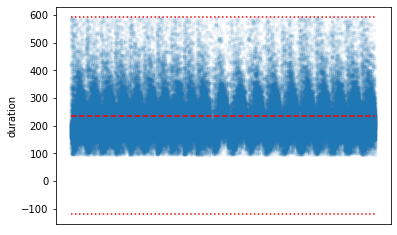

In [41]:
for column in df_ready_data_numeric:
    plot_3_std(column, df_data_without_outliers)

# Elementy Odosobnione - metoda kwartyli

In [42]:
def plot_quar(df, quartile_2, lower_bound, upper_bound):
    m = quartile_2
    m_p3std = lower_bound
    m_n3std = upper_bound
    y = df
    x = range(len(y))
    plt.plot([0, len(y)], [m, m], c='r', linestyle='--')
    plt.plot([0, len(y)], [m_p3std, m_p3std], c='r', linestyle=':')
    plt.plot([0, len(y)], [m_n3std, m_n3std], c='r', linestyle=':')
    plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')
    plt.ylabel(column)
    plt.xticks([])
    plt.show()

In [43]:
list_outliers = []

def outliers_iqr(ys):
    quartile_1, quartile_2, quartile_3 = np.percentile(ys, [25, 50, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_2 - 2.2*(quartile_3 - quartile_1)
    upper_bound = quartile_2 + 2.2*(quartile_3 - quartile_1)
    
    plot_quar(ys, quartile_2, lower_bound, upper_bound)
    
    df_filled_out = pd.DataFrame(df_ready_data_numeric[((ys > upper_bound) | (ys < lower_bound))][column]).join(df_data['name'])
    list_outliers.extend(df_filled_out.index)
    display(df_filled_out)

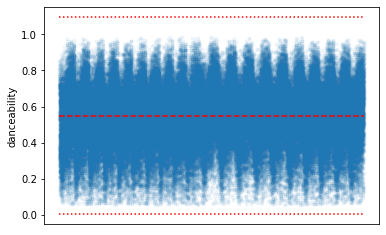

,danceability,name


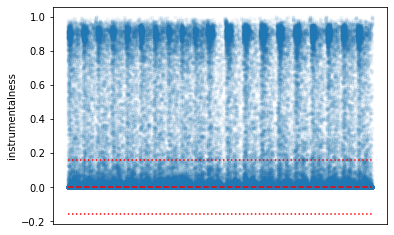

,instrumentalness,name
0,0.563,Singende Bataillone 1. Teil
1,0.901,"Fantasiestücke, Op. 111: Più tosto lento"
3,0.887,Bebamos Juntos - Instrumental (Remasterizado)
4,0.908,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
5,0.911,Scherzo a capriccio: Presto
...,...,...
169755,0.966,Soft Rain Pouring
169782,0.279,Demonz (feat. Brent Faiyaz) - Interlude
169788,0.433,WHEN I WAS OLDER - Music Inspired By The Film ...
169796,0.952,Wading in dreams


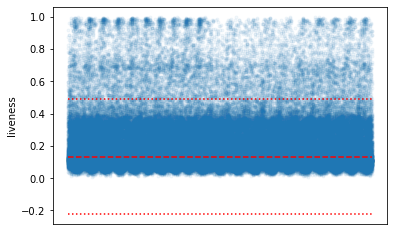

,liveness,name
55,0.593,I'd Rather Cry Over You
103,0.637,Μπεστενγκιάρ μανές
119,0.877,Edward the VIII
150,0.782,Siete Lágrimas - Remasterizado
192,0.666,Μου έδωσες την καρδούλα σου
...,...,...
169795,0.776,Out My Way
169827,0.706,Prices
169840,0.583,God Is Perfect
169864,0.588,No Regrets (feat. Don Toliver)


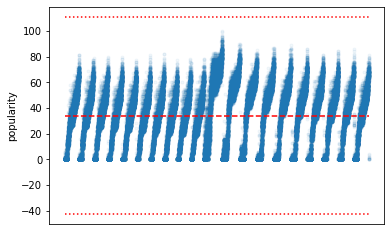

,popularity,name


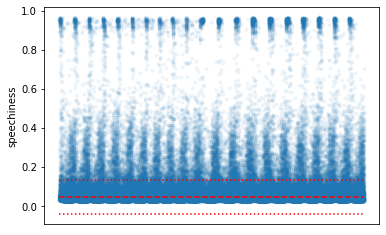

,speechiness,name
2,0.929,Chapter 1.18 - Zamek kaniowski
9,0.954,Chapter 1.3 - Zamek kaniowski
17,0.157,Invocación al Tango - Remasterizado
21,0.295,Quisiste Cachar un Gil - Instrumental (Remaste...
29,0.948,Chapter 4.12 - Zamek kaniowski
...,...,...
169898,0.161,Fine By Time
169899,0.339,Rough Ryder
169901,0.288,Letter To Nipsey (feat. Roddy Ricch)
169902,0.157,Back Home (feat. Summer Walker)


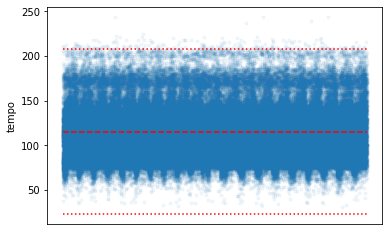

,tempo,name
146,210.173,Pantaleón - Remasterizado
280,211.089,Me Has Robado El Corazón
1832,212.242,Rocks In My Bed
2017,207.667,East of the Sun
5628,209.041,Return Of The Fly
...,...,...
165740,211.186,Protection
168319,208.706,I Wonder Why - Remastered
168550,209.774,El Favor De La Soledad
168581,207.576,Sun in an Empty Room


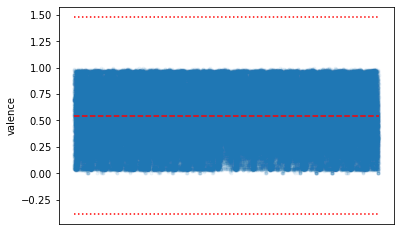

,valence,name


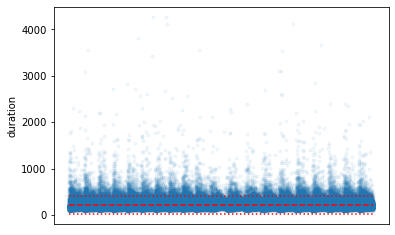

,duration,name
4,687.733,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
10,590.293,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I...."
27,505.920,"Scherzo No. 1 in B Minor, Op. 20"
49,491.333,"Danse macabre, S. 555 (after Camille Saint-Saens)"
54,519.933,"Barcarolle, Op. 60"
...,...,...
169299,538.760,Will The Circle Be Unbroken - Live
169358,489.361,Outback (Extended Remix)
169398,417.693,Ok Alright (feat. ScHoolboy Q)
169509,412.632,Me Mata


In [44]:
for column in df_ready_data_numeric:
    outliers_iqr(df_ready_data_numeric[column])

### Odrzucenie elementów odosobnionych

In [45]:
list_outliers = list(dict.fromkeys(list_outliers))
df_data_without_outliers_quartile = df_ready_data.copy()
df_data_without_outliers_quartile = df_data_without_outliers_quartile.drop(list_outliers)

### Porównanie

In [46]:
df_data_without_outliers_quartile.shape[0]

98638

In [47]:
df_data_without_outliers.shape[0]

154706

# Klasteryzacja

In [48]:
df_data_without_outliers

,artists,danceability,instrumentalness,liveness,name,popularity,speechiness,tempo,valence,year,duration
0,['Carl Woitschach'],0.708,0.563000,0.1510,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,158.648
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,0.901000,0.0763,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,282.133
3,['Francisco Canaro'],0.781,0.887000,0.1110,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,180.760
5,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,0.911000,0.0915,Scherzo a capriccio: Presto,0,0.0593,63.521,0.2660,1928,352.600
6,"['Franz Liszt', 'Vladimir Horowitz']",0.444,0.435000,0.0744,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,0.0400,80.495,0.3050,1928,136.627
...,...,...,...,...,...,...,...,...,...,...,...
169904,"['DripReport', 'Tyga']",0.875,0.000032,0.0891,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020,163.800
169905,"['Leon Bridges', 'Terrace Martin']",0.719,0.031300,0.1110,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020,167.468
169906,"['Kygo', 'Oh Wonder']",0.514,0.002330,0.1080,How Would I Know,70,0.1050,123.700,0.1530,2020,180.700
169907,"['Cash Cash', 'Andy Grammer']",0.646,0.000000,0.2220,I Found You,70,0.0385,129.916,0.4720,2020,167.308


In [49]:
df_data_without_outliers_numeric = df_data_without_outliers.copy()
df_data_without_outliers_numeric = df_data_without_outliers_numeric.drop(columns=['artists', 'name', 'year'])
df_data_without_outliers_numeric

,danceability,instrumentalness,liveness,popularity,speechiness,tempo,valence,duration
0,0.708,0.563000,0.1510,0,0.0506,118.469,0.7790,158.648
1,0.379,0.901000,0.0763,0,0.0462,83.972,0.0767,282.133
3,0.781,0.887000,0.1110,0,0.0926,108.003,0.7200,180.760
5,0.424,0.911000,0.0915,0,0.0593,63.521,0.2660,352.600
6,0.444,0.435000,0.0744,0,0.0400,80.495,0.3050,136.627
...,...,...,...,...,...,...,...,...
169904,0.875,0.000032,0.0891,75,0.1430,100.012,0.3060,163.800
169905,0.719,0.031300,0.1110,64,0.0403,128.000,0.2700,167.468
169906,0.514,0.002330,0.1080,70,0.1050,123.700,0.1530,180.700
169907,0.646,0.000000,0.2220,70,0.0385,129.916,0.4720,167.308


In [50]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [51]:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df_data_without_outliers_numeric)

In [60]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=43)

kmeans.fit(df_data_without_outliers_numeric)

KMeans(init='random', n_clusters=3, random_state=43)

In [61]:
kmeans.cluster_centers_

array([[4.66930995e-01, 2.86721011e-01, 1.84780429e-01, 2.98420417e+01,
        6.14887723e-02, 1.14294512e+02, 4.12506579e-01, 4.14531393e+02],
       [5.44024092e-01, 1.66008063e-01, 1.87603233e-01, 2.74397465e+01,
        7.25674956e-02, 1.16934819e+02, 5.80324539e-01, 1.73502432e+02],
       [5.55274864e-01, 1.11131379e-01, 1.79042537e-01, 4.12862039e+01,
        7.32999881e-02, 1.18740063e+02, 5.05001463e-01, 2.60606807e+02]])

In [62]:
kmeans.inertia_

387062898.4892085

In [63]:
kmeans.n_iter_

22

In [64]:
kmeans.cluster_centers_[0]

array([4.66930995e-01, 2.86721011e-01, 1.84780429e-01, 2.98420417e+01,
       6.14887723e-02, 1.14294512e+02, 4.12506579e-01, 4.14531393e+02])

In [65]:
cluster_0 = []
cluster_1 = []
cluster_2 = []
for index, x in enumerate(kmeans.labels_):
    if(x == 0):
        cluster_0.append(index)
    if(x == 1):
        cluster_1.append(index)
    if(x == 2):
        cluster_2.append(index)

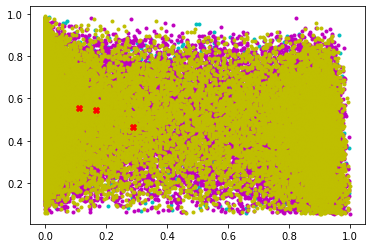

In [66]:
y = df_data_without_outliers_numeric['danceability'].loc[df_data_without_outliers_numeric.index.intersection(cluster_0)]
x = df_data_without_outliers_numeric['instrumentalness'].loc[df_data_without_outliers_numeric.index.intersection(cluster_0)]
plt.scatter(x, y, marker='.', alpha=1, c='c', cmap='viridis')

y = df_data_without_outliers_numeric['danceability'].loc[df_data_without_outliers_numeric.index.intersection(cluster_1)]
x = df_data_without_outliers_numeric['instrumentalness'].loc[df_data_without_outliers_numeric.index.intersection(cluster_1)]
plt.scatter(x, y, marker='.', alpha=1, c='m', cmap='viridis')

y = df_data_without_outliers_numeric['danceability'].loc[df_data_without_outliers_numeric.index.intersection(cluster_2)]
x = df_data_without_outliers_numeric['instrumentalness'].loc[df_data_without_outliers_numeric.index.intersection(cluster_2)]
plt.scatter(x, y, marker='.', alpha=1, c='y', cmap='viridis')

y = [kmeans.cluster_centers_[0][0],
    kmeans.cluster_centers_[1][0],
    kmeans.cluster_centers_[2][0]]

x = [kmeans.cluster_centers_[0][1],
    kmeans.cluster_centers_[1][1],
    kmeans.cluster_centers_[2][1]]

plt.scatter(x, y, marker='X', alpha=1, c='r', cmap='viridis')

plt.show()

In [67]:
df_data_without_outliers_numeric['danceability'].loc[df_data_without_outliers_numeric.index.intersection(cluster_2)]

1         0.379
10        0.376
12        0.359
17        0.787
23        0.811
          ...  
154687    0.388
154690    0.320
154697    0.514
154700    0.731
154705    0.394
Name: danceability, Length: 53790, dtype: float64

# Klasyfikacja